# Lab 3: Policy Search

## Task

Write agents able to play [*Nim*](https://en.wikipedia.org/wiki/Nim), with an arbitrary number of rows and an upper bound $k$ on the number of objects that can be removed in a turn (a.k.a., *subtraction game*).

The player **taking the last object wins**.

* Task3.1: An agent using fixed rules based on *nim-sum* (i.e., an *expert system*)
* Task3.2: An agent using evolved rules
* Task3.3: An agent using minmax
* Task3.4: An agent using reinforcement learning

## Instructions

* Create the directory `lab3` inside the course repo 
* Put a `README.md` and your solution (all the files, code and auxiliary data if needed)

In [17]:
%load_ext autoreload
%autoreload 2

from task1_lib import gabriele, pure_random, fixed_rules_strategy
from task2_lib import run_GA, strategy_0, strategy_1, strategy_2
from task4_lib import task4_run
from nim_utils import evaluate, evaluate_GA, play_match

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Task 1

In [2]:
NUM_MATCHES = 100
NIM_SIZE = 10
K_SIZE = None

print(f"Win-rate against {gabriele.__name__}: {evaluate(fixed_rules_strategy, gabriele, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")
print(f"Win-rate against {pure_random.__name__}: {evaluate(fixed_rules_strategy, pure_random, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")


Win-rate against gabriele: 1.0
Win-rate against pure_random: 0.92


# Task 2

In [68]:
# Strategy 0
print(f"[info] - Strategy 0 results...")
genome_parameters = ["alpha", "beta", "gamma"]
num_generations = 150
best_genome = run_GA(genome_parameters, strategy_0, num_generations)

print(f"Win-rate against gabriele: {evaluate_GA(best_genome, strategy_0, gabriele, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")
print(f"Win-rate against pure_random: {evaluate_GA(best_genome, strategy_0, pure_random, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")


# Strategy 1
print(f"[info] - Strategy 1 results...")
genome_parameters = ["alpha", "beta"]
num_generations = 30
best_genome = run_GA(genome_parameters, strategy_1, num_generations)

print(f"Win-rate against gabriele: {evaluate_GA(best_genome, strategy_1, gabriele, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")
print(f"Win-rate against pure_random: {evaluate_GA(best_genome, strategy_1, pure_random, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")


# Strategy 2
print(f"[info] - Strategy 2 results...")
genome_parameters = ["alpha", "beta", "gamma", "percentage"]
num_generations = 30
best_genome = run_GA(genome_parameters, strategy_2, num_generations)

print(f"Win-rate against gabriele: {evaluate_GA(best_genome, strategy_2, gabriele, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")
print(f"Win-rate against pure_random: {evaluate_GA(best_genome, strategy_2, pure_random, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")

[info] - Strategy 0 results...
[info] - Start generating the population


100%|██████████| 50/50 [00:03<00:00, 15.22it/s]


[info] - Evolving...


100%|██████████| 150/150 [03:55<00:00,  1.57s/it]


[info] - Best genome found is {'alpha': 0.011386665687883157, 'beta': 0.9062171717087414, 'gamma': 0.9873926707644166} with fitness: (0.95, 0.6)
Win-rate against gabriele: 0.88
Win-rate against pure_random: 0.52
[info] - Strategy 1 results...
[info] - Start generating the population


100%|██████████| 50/50 [00:02<00:00, 23.87it/s]


[info] - Evolving...


100%|██████████| 30/30 [00:25<00:00,  1.17it/s]


[info] - Best genome found is {'alpha': 0.8522898164482559, 'beta': 0.2373071439533727} with fitness: (1.0, 0.99)
Win-rate against gabriele: 1.0
Win-rate against pure_random: 0.86
[info] - Strategy 2 results...
[info] - Start generating the population


100%|██████████| 50/50 [00:13<00:00,  3.79it/s]


[info] - Evolving...


100%|██████████| 30/30 [03:23<00:00,  6.79s/it]


[info] - Best genome found is {'alpha': 0.012787059560542713, 'beta': 0.09369813057952592, 'gamma': 0.9237723033079731, 'percentage': 0.3821294817321689} with fitness: 0.995
Win-rate against gabriele: 0.98
Win-rate against pure_random: 0.95


In [69]:
import random
from nimply import Nim


def challenge(genome0, strategy_0, genome1, strategy_1, num_matches=100, nim_size=10, k_size=None):
    won = 0

    for m in range(num_matches):
        nim = Nim(nim_size, k=k_size)
        player = random.randint(0, 1)
        while nim:
            if player == 0:
                ply = strategy_0(nim, genome0)
            else:
                ply = strategy_1(nim, genome1)
            nim.nimming(ply)
            player = 1 - player
        if player == 1:
            won += 1
    return won / num_matches

genome0 = {'alpha': 0.33806644070961167, 'beta': 0.8983983212868427, 'gamma': 0.9974669535320325}
genome1 = {'alpha': 0.8191618758747532, 'beta': 0.10484407005864857}

challenge(genome0, strategy_0, genome1, strategy_1)

# Task 3

# Task 4

0: 0/50
50: 30/50
100: 22/50
150: 23/50
200: 25/50
250: 31/50
300: 22/50
350: 28/50
400: 26/50
450: 24/50
500: 20/50
550: 27/50
600: 23/50
650: 25/50
700: 24/50
750: 22/50
800: 29/50
850: 24/50
900: 26/50
950: 25/50
1000: 22/50
1050: 26/50
1100: 25/50
1150: 21/50
1200: 25/50
1250: 29/50
1300: 26/50
1350: 16/50
1400: 26/50
1450: 22/50
1500: 28/50
1550: 20/50
1600: 26/50
1650: 30/50
1700: 30/50
1750: 26/50
1800: 23/50
1850: 21/50
1900: 27/50
1950: 22/50
2000: 24/50
2050: 30/50
2100: 25/50
2150: 32/50
2200: 29/50
2250: 27/50
2300: 22/50
2350: 21/50
2400: 28/50
2450: 28/50
2500: 28/50
2550: 27/50
2600: 25/50
2650: 32/50
2700: 26/50
2750: 24/50
2800: 32/50
2850: 27/50
2900: 27/50
2950: 19/50
3000: 27/50
3050: 25/50
3100: 25/50
3150: 22/50
3200: 26/50
3250: 24/50
3300: 19/50
3350: 25/50
3400: 24/50
3450: 25/50
3500: 22/50
3550: 23/50
3600: 27/50
3650: 27/50
3700: 26/50
3750: 23/50
3800: 22/50
3850: 31/50
3900: 23/50
3950: 23/50
4000: 21/50
4050: 21/50
4100: 22/50
4150: 28/50
4200: 24/50
4250

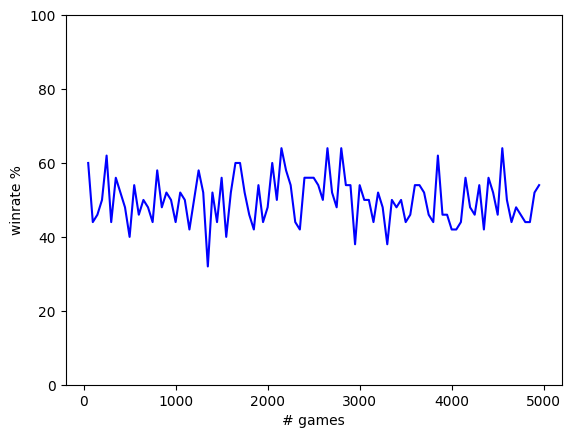

In [18]:
task4_run()

## Oversimplified match

In [70]:
play_match(fixed_rules_strategy, pure_random, 10, k_size=None)